# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import numpy as np

# Challenge 1

Download the `employees` dataset from [here](https://drive.google.com/file/d/1qiyQHmmntBsGHjlLSoSh9-t_R4UXOg_H/view?usp=sharing) and place it in the data folder

Load and save your dataset in a variable called `employees`.

In [2]:
# your code here
employees = pd.read_csv('..\\data\\Employee.csv')
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
# Method 1 - without pivot
# your code here
employees[['Department', 'Salary']].groupby('Department').mean()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Method 2 - with pivot
# your code here
pd.pivot_table(employees, values='Salary', columns='Department', aggfunc='mean')

Department,HR,IT,Sales
Salary,45.0,48.75,55.0


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
# your code here
employees.pivot_table(values='Salary', index=['Department', 'Title'], aggfunc='mean')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [6]:
# your code here
employees.pivot_table(values=['Salary','Years'], columns=['Title'], aggfunc='mean')

Title,VP,analyst,associate
Salary,70.0,32.50,56.666667
Years,8.0,2.25,4.000000


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [7]:
# your code here
employees.pivot_table(values=['Salary', 'Name'], index='Department', columns='Title', aggfunc={'Salary': 'mean', 'Name': 'count'})

Name                   Salary                  
Title        VP analyst associate     VP analyst associate
Department                                                
HR          1.0     2.0       NaN   70.0    32.5       NaN
IT          1.0     2.0       1.0   70.0    32.5      60.0
Sales       NaN     NaN       2.0    NaN     NaN      55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [8]:
# your code here
employees.pivot_table(values='Salary', index=['Department', 'Title'], aggfunc={'Salary': [np.median, min, max, np.std]})

max  median   min       std
Department Title                                  
HR         VP         70.0    70.0  70.0       NaN
           analyst    35.0    32.5  30.0  3.535534
IT         VP         70.0    70.0  70.0       NaN
           analyst    35.0    32.5  30.0  3.535534
           associate  60.0    60.0  60.0       NaN
Sales      associate  55.0    55.0  55.0  0.000000

In [9]:
"""
your commments here:
The dataset is not that large, so sometimes there's only one employee per jobtitle. 
If you really want to say something meaningful, you'd need to have a larger dataset. 
This also means there are missing standard deviations.
"""

"\nyour commments here:\nThe dataset is not that large, so sometimes there's only one employee per jobtitle. \nIf you really want to say something meaningful, you'd need to have a larger dataset. \nThis also means there are missing standard deviations.\n"

#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
# your code here
"""
Is it possible to fill in a std? Seems odd to me?
"""

'\nIs it possible to fill in a std? Seems odd to me?\n'

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [36]:
# your code here
employees.pivot_table(values=['Salary', 'Name'], index='Department', aggfunc={'Salary': 'sum', 'Name': 'count'})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [37]:
# your code here
employees.pivot_table(values=['Salary', 'Years'], index=['Department', 'Title'], aggfunc={'Salary': 'mean', 'Years': 'sum'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [13]:
# your code here

# Challenge 2

Read the `fitbit` dataset from
[here](https://drive.google.com/file/d/1V3A0sRLmAb6BDFoZBIrjUOMl5Ap9wSts/view?usp=sharing) and place it in the data folder


Save your data in a variable called `fitbit`.

In [39]:
# your code here
fitbit = pd.read_csv('..\\data\\Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [43]:
# your code here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [44]:
fitbit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [48]:
# your code here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062607

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [49]:
import matplotlib.pyplot as plt

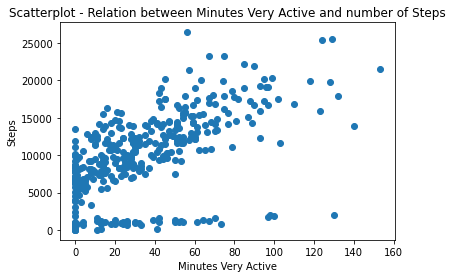

In [52]:
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.title('Scatterplot - Relation between Minutes Very Active and number of Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [53]:
"""
your commments here
The linear relation ships is moderate. It is possible to be very active without registering steps (for instance cycling).
On the other hand, it's also possible to walk very slowly, so the number of active minutes is low, but steps is high. 
"""

"\nyour commments here\nThe linear relation ships is moderate. It is possible to be very active without registering steps (for instance cycling).\nOn the other hand, it's also possible to walk very slowly, so the number of active minutes is low, but steps is high. \n"

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [54]:
# your code here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.0769060806299009

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

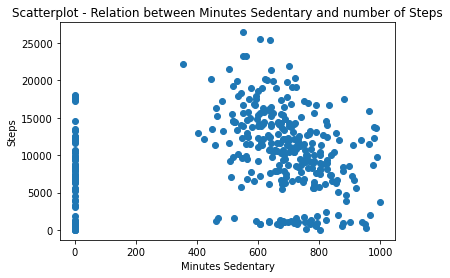

In [55]:
# your code here
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.title('Scatterplot - Relation between Minutes Sedentary and number of Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [56]:
"""
your commments here
There's no linear relationship between the both. The blank spot between 0 - 400 minutes Sedentary is remarkable.
"""

"\nyour commments here\nThere's no linear relationship between the both. The blank spot between 0 - 400 minutes Sedentary is remarkable.\n"

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [57]:
# your code here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836383

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

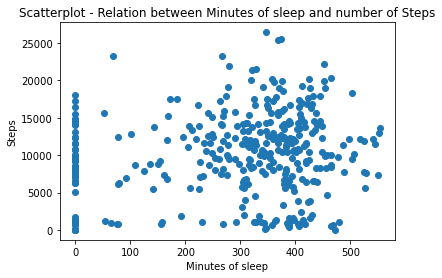

In [58]:
# your code here
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.title('Scatterplot - Relation between Minutes of sleep and number of Steps')
plt.xlabel('Minutes of sleep')
plt.ylabel('Steps')
plt.show()

In [59]:
"""
your commments here
There's no linear relationship between minutes of sleep and number of steps.
"""

"\nyour commments here\nThere's no linear relationship between minutes of sleep and number of steps.\n"

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [62]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']
fit = fitbit[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']]

In [65]:
# your code here
cor_fit = fit.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [ ]:
"""
Most correlated with nmber of steps is 'Minutes very active'. If that value increases, number of steps increases as well.
"""

In [68]:
# your code here
cor_fit_sort = cor_fit.sort_values(by='Steps', ascending=False)
cor_fit_sort

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

Read the `time_grades` dataset from 
[here](https://drive.google.com/file/d/1zKAqZPjLnU96cvfMzqfFz-hH6YxCNVKN/view?usp=sharing) and place it in the data folder


Save your data in a variable called `time_grades`.

In [69]:
# your code here
time_grades = pd.read_csv('..\\data\\Time_Grades.csv')
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the `time_grades` dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x092A3790>,
      dtype=object)

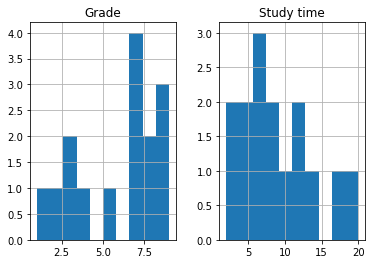

In [78]:
# your code here
time_grades.hist()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [76]:
# your code here
time_grades['Study time'].corr(time_grades['Grade'],'pearson')

0.7980456073578858

In [77]:
time_grades['Study time'].corr(time_grades['Grade'],'spearman')

0.819658753036942

In [32]:
"""
your commments here
There's a high correlation between the two!
"""

'\nyour commments here\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

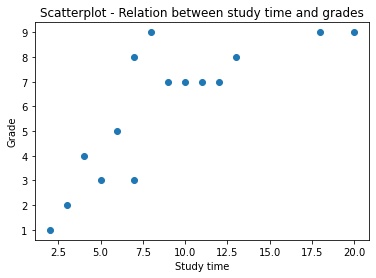

In [74]:
# your code here
plt.scatter(time_grades['Study time'], time_grades['Grade'])
plt.title('Scatterplot - Relation between study time and grades')
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

In [34]:
"""
your commments here
When study time increases, the grade increases as well. There's a strong correlation between the two.
"""

'\nyour commments here\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [35]:
"""
your commments here
Pearson correlation can only be used to evaluate a linear relationship between two continuous variables.
Spearman correlation can be used to evaluate a monotonic relationship between two variables, continuous or ordinal. 
Monotonic means that 1) as the value of one variable increases, so does the value of the other variable; or 
2)as the value of one variable increases, the other variable value decreases.
But, not exactly at a constant rate whereas in a linear relationship the rate of increase/decrease is constant.
"""

'\nyour commments here\n'